# <hr style = 'border:4.5px solid #f3ff06'></hr> **Top Companies Data Analysis** <hr style = 'border:4.5px solid #f3ff06'></hr>

## **Analysis of Top Companies**
+ This project analyzes data from top companies across different sectors. The goal is to extract insights and present them in an easy-to-understand format.

## **Objective**
+ The purpose of this analysis is to evaluate and compare the ratings, total reviews, and salary structures of various companies in order to provide insights for prospective employees.

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## **Data Collection**

In [2]:
# Update the file path based on the actual location of your CSV file
data = pd.read_csv("companies.csv")
cmpny_df = data.copy()
cmpny_df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584.6k,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561.5k,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427.4k,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414.4k,2.8k,719,4k


In [3]:
cmpny_df.shape

(10000, 10)

## **Data Cleaning**

In [4]:
# Check Non-null values and Data Type of each column
cmpny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      9908 non-null   object 
 4   Critically_rated_for  2807 non-null   object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [5]:
# Fillna temporary value for the null values in the column "Highly_rated_for"
cmpny_df['Highly_rated_for'] = cmpny_df['Highly_rated_for'].fillna('Not Rated')
cmpny_df['Critically_rated_for'] = cmpny_df['Critically_rated_for'].fillna('Not Rated')
print((cmpny_df['Highly_rated_for'] == 'Not Rated').sum())
print((cmpny_df['Critically_rated_for'] == 'Not Rated').sum())

92
7193


In [6]:
cmpny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          10000 non-null  object 
 1   Description           10000 non-null  object 
 2   Ratings               10000 non-null  float64
 3   Highly_rated_for      10000 non-null  object 
 4   Critically_rated_for  10000 non-null  object 
 5   Total_reviews         10000 non-null  object 
 6   Avg_salary            10000 non-null  object 
 7   Interviews_taken      10000 non-null  object 
 8   Total_jobs_available  10000 non-null  object 
 9   Total_benefits        10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [7]:
# Find duplicate rows in the dataframe
duplicate_rows = cmpny_df[cmpny_df.duplicated()]

# Display the duplicate rows
duplicate_rows

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
960,eClinicalWorks,Software Product | 1k-5k Employees | 25 years ...,3.9,"Job Security, Salary & Benefits, Company Culture",Promotions / Appraisal,740,4.8k,33,12,169
1020,Suzuki Motorcycle,Automobile | 1k-5k Employees | 27 years old | ...,4.1,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal,689,3.6k,24,1,95
1361,EPL Limited,Packaging | 1k-5k Employees | Public | 40 year...,4.0,"Job Security, Skill Development / Learning","Promotions / Appraisal, Salary & Benefits",521,1.8k,15,1,73
1660,Colt Technology Services,Hardware & Networking | 1k-5k Employees | 32 y...,4.4,"Work Life Balance, Company Culture, Job Security",Not Rated,437,3.3k,19,7,88
1840,Suroj Buildcon,Engineering & Construction | 1k-5k Employees |...,4.1,"Company Culture, Job Security, Skill Developme...",Not Rated,395,1.3k,12,1,56
...,...,...,...,...,...,...,...,...,...,...
9987,Fitness First,Fitness & Wellness | 501-1k Employees | 16 yea...,4.7,"Skill Development / Learning, Company Culture,...",Not Rated,72,288,1,--,16
9988,Mothercare,Retail | 51-200 Employees | Public | 63 years ...,3.8,"Job Security, Skill Development / Learning",Promotions / Appraisal,72,243,2,--,12
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",Not Rated,72,454,2,26,21
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",Not Rated,72,799,15,9,13


In [8]:
cmpny_df.drop_duplicates(inplace=True)

In [9]:
cmpny_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9359 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          9359 non-null   object 
 1   Description           9359 non-null   object 
 2   Ratings               9359 non-null   float64
 3   Highly_rated_for      9359 non-null   object 
 4   Critically_rated_for  9359 non-null   object 
 5   Total_reviews         9359 non-null   object 
 6   Avg_salary            9359 non-null   object 
 7   Interviews_taken      9359 non-null   object 
 8   Total_jobs_available  9359 non-null   object 
 9   Total_benefits        9359 non-null   object 
dtypes: float64(1), object(9)
memory usage: 804.3+ KB


In [10]:
cmpny_df.head(2)

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856.9k,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",Not Rated,46.4k,584.6k,4.3k,9.9k,7.1k


+ The code snippet you provided is converting certain columns in a DataFrame to numeric values. It first converts the values to strings, removes 'k', replaces '--' with '0', and then converts the result to numeric values. If there are any errors during the conversion to numeric, they are coerced to NaN (null values).

Here are a few reasons why this might create null values:

1. **Non-numeric Strings**: If there are any strings that cannot be converted to numbers (even after removing 'k' and replacing '--'), they will be converted to NaN.

2. **Empty Strings**: If any of the cells are empty strings, they will be converted to NaN.

3. **Other Non-standard Formats**: If there are other non-standard formats that are not handled by your replacements, they will be converted to NaN.

+ To debug this, you can inspect the intermediate steps to see where the conversion might be failing. Here's an example of how you can do that:

In [11]:
# Remove 'k' and convert to numeric for the specified columns
columns_to_convert = ["Total_reviews", "Avg_salary", "Interviews_taken", "Total_jobs_available", "Total_benefits"]

for column in columns_to_convert:
    # Step 1: Convert to string
    step1 = cmpny_df[column].astype(str)
    
    # Step 2: Remove 'k'
    step2 = step1.str.replace('k', '', regex=True)
    
    # Step 3: Replace '--' with '0'
    step3 = step2.replace('--', 0)
    
    # Step 4: Convert to numeric and multiply by 1000
    cmpny_df[column] = pd.to_numeric(step3, errors='coerce') * 1000
    
    # Print intermediate steps for debugging
    print(f"Column: {column}")
    print(step1.head())
    print(step2.head())
    print(step3.head())
    print(cmpny_df[column].head())

Column: Total_reviews
0    73.1k
1    46.4k
2    41.7k
3    39.2k
4      34k
Name: Total_reviews, dtype: object
0    73.1
1    46.4
2    41.7
3    39.2
4      34
Name: Total_reviews, dtype: object
0    73.1
1    46.4
2    41.7
3    39.2
4      34
Name: Total_reviews, dtype: object
0    73100.0
1    46400.0
2    41700.0
3    39200.0
4    34000.0
Name: Total_reviews, dtype: float64
Column: Avg_salary
0    856.9k
1    584.6k
2    561.5k
3    427.4k
4    414.4k
Name: Avg_salary, dtype: object
0    856.9
1    584.6
2    561.5
3    427.4
4    414.4
Name: Avg_salary, dtype: object
0    856.9
1    584.6
2    561.5
3    427.4
4    414.4
Name: Avg_salary, dtype: object
0    856900.0
1    584600.0
2    561500.0
3    427400.0
4    414400.0
Name: Avg_salary, dtype: float64
Column: Interviews_taken
0    6.1k
1    4.3k
2    3.6k
3    3.7k
4    2.8k
Name: Interviews_taken, dtype: object
0    6.1
1    4.3
2    3.6
3    3.7
4    2.8
Name: Interviews_taken, dtype: object
0    6.1
1    4.3
2    3.6
3    3

In [12]:
cmpny_df.head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847000.0,11500.0
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",Not Rated,46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41700.0,561500.0,3600.0,460000.0,5800.0
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39200.0,427400.0,3700.0,405000.0,5000.0
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34000.0,414400.0,2800.0,719000.0,4000.0


In [13]:
cmpny_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9359 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          9359 non-null   object 
 1   Description           9359 non-null   object 
 2   Ratings               9359 non-null   float64
 3   Highly_rated_for      9359 non-null   object 
 4   Critically_rated_for  9359 non-null   object 
 5   Total_reviews         9359 non-null   float64
 6   Avg_salary            9359 non-null   float64
 7   Interviews_taken      9359 non-null   float64
 8   Total_jobs_available  9359 non-null   float64
 9   Total_benefits        9359 non-null   float64
dtypes: float64(6), object(4)
memory usage: 804.3+ KB


In [14]:
# Split the Description column into multiple columns
description_split = cmpny_df['Description'].str.split('|', expand=True)

# Extract key information and create new columns
cmpny_df['Industry'] = description_split[0].str.strip()
cmpny_df['Employees'] = description_split[1].str.strip()
cmpny_df['Company_Type'] = description_split[2].str.strip()
cmpny_df["Company's_years"] = description_split[3].str.strip()
cmpny_df.drop(columns=['Description'], inplace=True)

# Display the updated dataframe
cmpny_df.head(2)

,Company_name,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Industry,Employees,Company_Type,Company's_years
0,TCS,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73100.0,856900.0,6100.0,847000.0,11500.0,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old
1,Accenture,4.0,"Company Culture, Skill Development / Learning,...",Not Rated,46400.0,584600.0,4300.0,9900.0,7100.0,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old


In [15]:
# Define the new order of columns
new_order = ['Company_name', 'Industry', 'Employees', 'Company_Type', "Company's_years", 'Highly_rated_for', 'Critically_rated_for', 'Ratings', 'Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']

# Reorder the columns
cmpny_df = cmpny_df[new_order]

# Display the updated dataframe
cmpny_df.head(2)

,Company_name,Industry,Employees,Company_Type,Company's_years,Highly_rated_for,Critically_rated_for,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",3.8,73100.0,856900.0,6100.0,847000.0,11500.0
1,Accenture,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,"Company Culture, Skill Development / Learning,...",Not Rated,4.0,46400.0,584600.0,4300.0,9900.0,7100.0


In [16]:
cmpny_df["Company's_years"] = cmpny_df["Company's_years"].str.replace('years old', '').str.strip()
cmpny_df.head(2)

,Company_name,Industry,Employees,Company_Type,Company's_years,Highly_rated_for,Critically_rated_for,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting,1 Lakh+ Employees,Public,56,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",3.8,73100.0,856900.0,6100.0,847000.0,11500.0
1,Accenture,IT Services & Consulting,1 Lakh+ Employees,Public,35,"Company Culture, Skill Development / Learning,...",Not Rated,4.0,46400.0,584600.0,4300.0,9900.0,7100.0


## **Descriptive Analysis**

In [17]:
cmpny_description = (cmpny_df.describe()).round(2)
cmpny_description

,Ratings,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
count,9359.00,9359.00,9359.00,9359.00,9359.00,9359.00
mean,3.90,199173.04,329477.04,20926.55,18024.14,44720.43
std,0.38,181198.54,319582.00,48910.92,55824.73,84065.01
min,1.30,1000.00,0.00,0.00,0.00,0.00
25%,3.70,89000.00,2500.00,4000.00,0.00,11000.00
50%,3.90,133000.00,326000.00,8000.00,2000.00,19000.00
75%,4.10,244000.00,587000.00,17000.00,13000.00,40000.00
max,5.00,999000.00,999000.00,972000.00,981000.00,973000.00


## **Data Visualization**

#### **Create a function to format the x-axis labels or y-axis labels**

In [18]:
from matplotlib.ticker import FuncFormatter

# Function to format the x-axis labels
def value_format(num, pos):
    if num >= 1e9:
        return f'{num*1e-9:.1f}b'
    elif num >= 1e6:
        return f'{num*1e-6:.1f}m'
    elif num >= 1e3:
        return f'{num*1e-3:.1f}k'
    else:
        return f'{num:.1f}'
    
# 1e9 = 1 followed by 9 zeros = 1,000,000,000
# 1e-9 = 1 divided by 1 followed by 9 zeros = 0.000000001

#### **Distribution of Ratings**

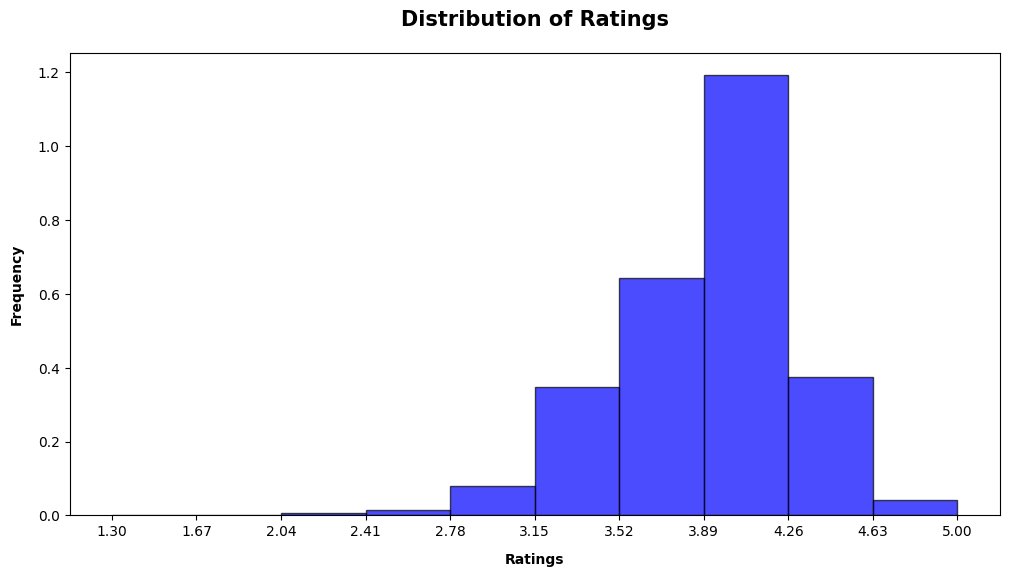

In [19]:
plt.figure(figsize=(12, 6))
counts, bin_edges, _ = plt.hist(cmpny_df['Ratings'], bins=10, density=True, color='blue', edgecolor='black', alpha=0.7)

# Add Titles and Labels
plt.title('Distribution of Ratings', size = 15, weight = 'bold', pad = 20)
plt.xticks(bin_edges) # Add bin edges to x-axis
plt.xlabel('Ratings', size = 10, weight = 'semibold', labelpad=10)
plt.ylabel('Frequency', size = 10, weight = 'semibold', labelpad=10)

plt.show()

#### **Distribution of Average Salary**

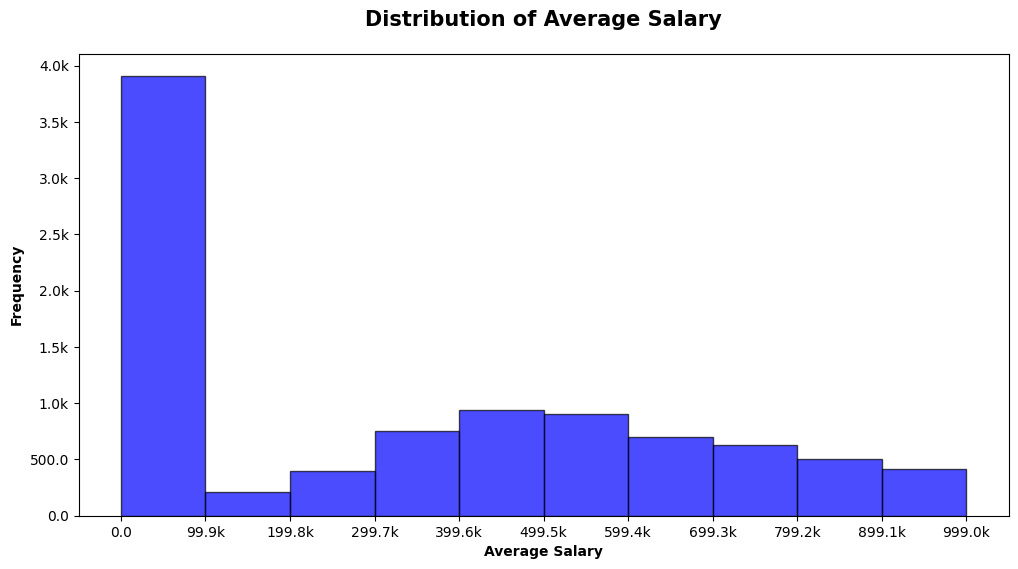

In [20]:
plt.figure(figsize=(12, 6))
counts, bin_edges, _ = plt.hist(cmpny_df['Avg_salary'], bins=10, color='blue', edgecolor='black', alpha=0.7)

# Add Titles and Labels
plt.title('Distribution of Average Salary', size=15, weight='bold', pad=20)
plt.xlabel('Average Salary', size=10, weight='semibold')
plt.ylabel('Frequency', size=10, weight='semibold')

# Format the x-axis labels
formatter = FuncFormatter(value_format)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add bin edges to x-axis
plt.xticks(bin_edges)

plt.show()

#### **Which company is most beneficial company?**

                   Company_name  Total_benefits
175                 Whitehat jr        973000.0
53   Sutherland Global Services        940000.0
50                 Asian Paints        904000.0
74              JP Morgan Chase        904000.0
69                  Wells Fargo        903000.0


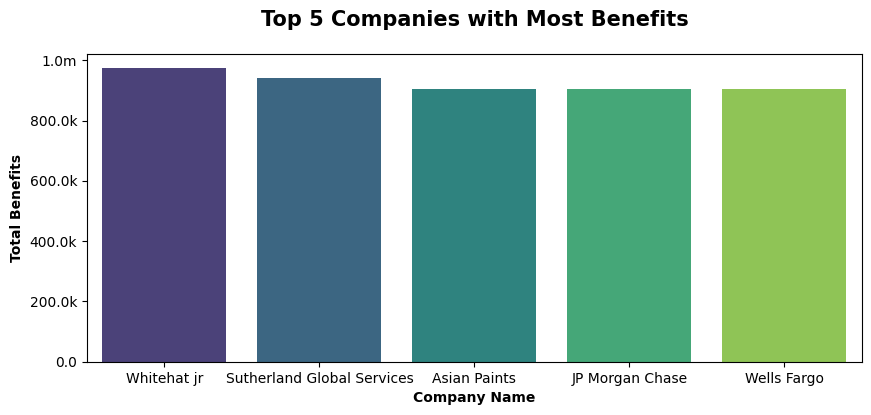

In [21]:
most_beneficial_cmpny = cmpny_df.nlargest(5, 'Total_benefits')
most_beneficial_cmpny = most_beneficial_cmpny[['Company_name', 'Total_benefits']]
print(most_beneficial_cmpny)

plt.figure(figsize=(10, 4))
sns.barplot(x='Company_name', y='Total_benefits', data=most_beneficial_cmpny, palette='viridis')

# Add Titles and Labels
plt.title('Top 5 Companies with Most Benefits', size=15, weight='bold', pad=20)
plt.xlabel('Company Name', size=10, weight='semibold')
plt.ylabel('Total Benefits', size=10, weight='semibold')

# Format the y-axis labels
formatter = FuncFormatter(value_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#### **What is difference between Average Salary vs Company Ratings**

                                        Company_name  Ratings  Avg_salary
4340                               Matrimonialsindia      5.0    114000.0
2652                                  Stirring Minds      5.0     31000.0
4916                  Deejos Engineers & Contractors      5.0     28000.0
3388  Dr.SNS Rajalakshmi College Of Arts and Science      5.0     20000.0
8750                       Jayasree Techno Solutions      5.0     13000.0
8749                                     Teqtous Inc      5.0      9000.0
7691                                      IBC Techno      5.0      4000.0
1759                                       InternEzy      5.0      3000.0
1400                             Lavender Technology      5.0      2000.0
2137                       Royal Migration Solutions      5.0      2000.0


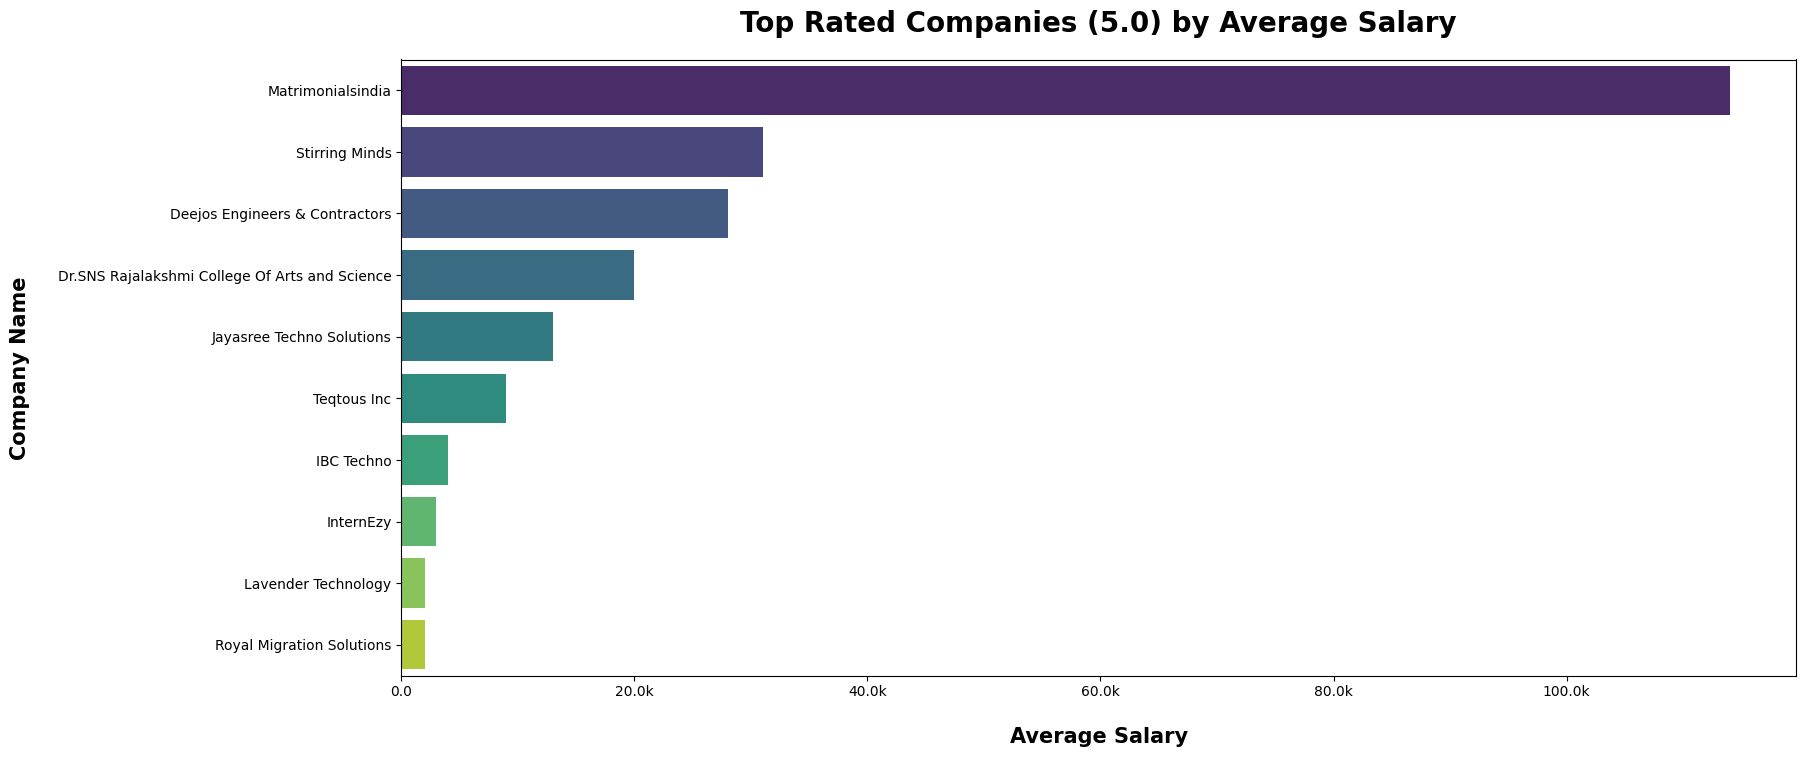

In [22]:
top_rated_cmpny = cmpny_df[cmpny_df['Ratings'] >= 4.0]
top_rated_cmpny = top_rated_cmpny[['Company_name', 'Ratings', 'Avg_salary']]
highest_salary_cmpny = top_rated_cmpny.sort_values(by=['Ratings', 'Avg_salary'], ascending=False).head(10)
print(highest_salary_cmpny)

# Create the plot
plt.figure(figsize=(18, 8))
sns.barplot(data=highest_salary_cmpny, x='Avg_salary', y='Company_name', orient='h', palette='viridis')

# Add title and labels
plt.title('Top Rated Companies (5.0) by Average Salary', size=20, weight='bold', pad=20)
plt.xlabel('Average Salary', size=15, weight='semibold', labelpad=20)
plt.ylabel('Company Name', size=15, weight='semibold', labelpad=20)

plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

#### **What is the market share of each industry based on the company descriptions?**

Industry
IT Services & Consulting      13.07
Engineering & Construction     4.98
Auto Components                4.56
Industrial Machinery           4.20
Pharma                         3.76
Healthcare                     3.50
Education & Training           3.40
Financial Services             2.93
Software Product               2.62
Internet                       2.59
Name: proportion, dtype: float64


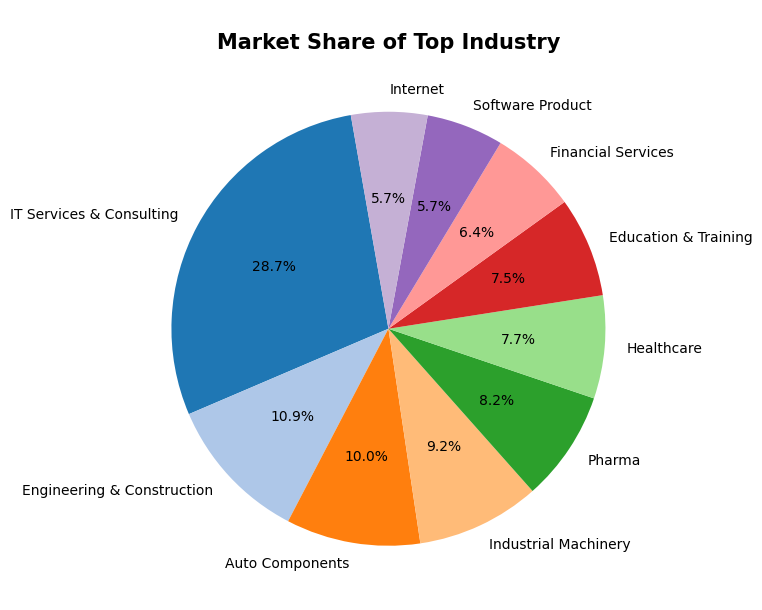

In [23]:
# Calculate Market Share by Industry
cmpny_markert_share = cmpny_df['Industry'].value_counts(normalize=True) * 100
cmpny_markert_share = cmpny_markert_share.round(2).head(10)
print(cmpny_markert_share)

# Plot the pie chart for market share by industry
plt.figure(figsize=(7, 12))
colors = plt.get_cmap('tab20').colors
plt.pie(cmpny_markert_share.values, labels = cmpny_markert_share.index, autopct='%1.1f%%', startangle = 100, colors=colors)

# Add title
plt.title('\nMarket Share of Top Industry', size=15, weight='bold')

# Show plot
plt.show()

#### **What is the difference between Most Available Job vs Interview Taken?**

            Company_name  Total_jobs_available  Interviews_taken
0    Indiamart Intermesh              981000.0          374000.0
1           Tata Capital              959000.0          104000.0
2                 BYJU'S              885000.0            1800.0
3                    TCS              847000.0            6100.0
4                Gartner              846000.0           30000.0
5  Capgemini Engineering              840000.0          196000.0
6              Info Edge              834000.0          197000.0
7       Crescendo Global              819000.0            2000.0
8                Genpact              782000.0            1900.0
9         Freelancer.com              761000.0           45000.0


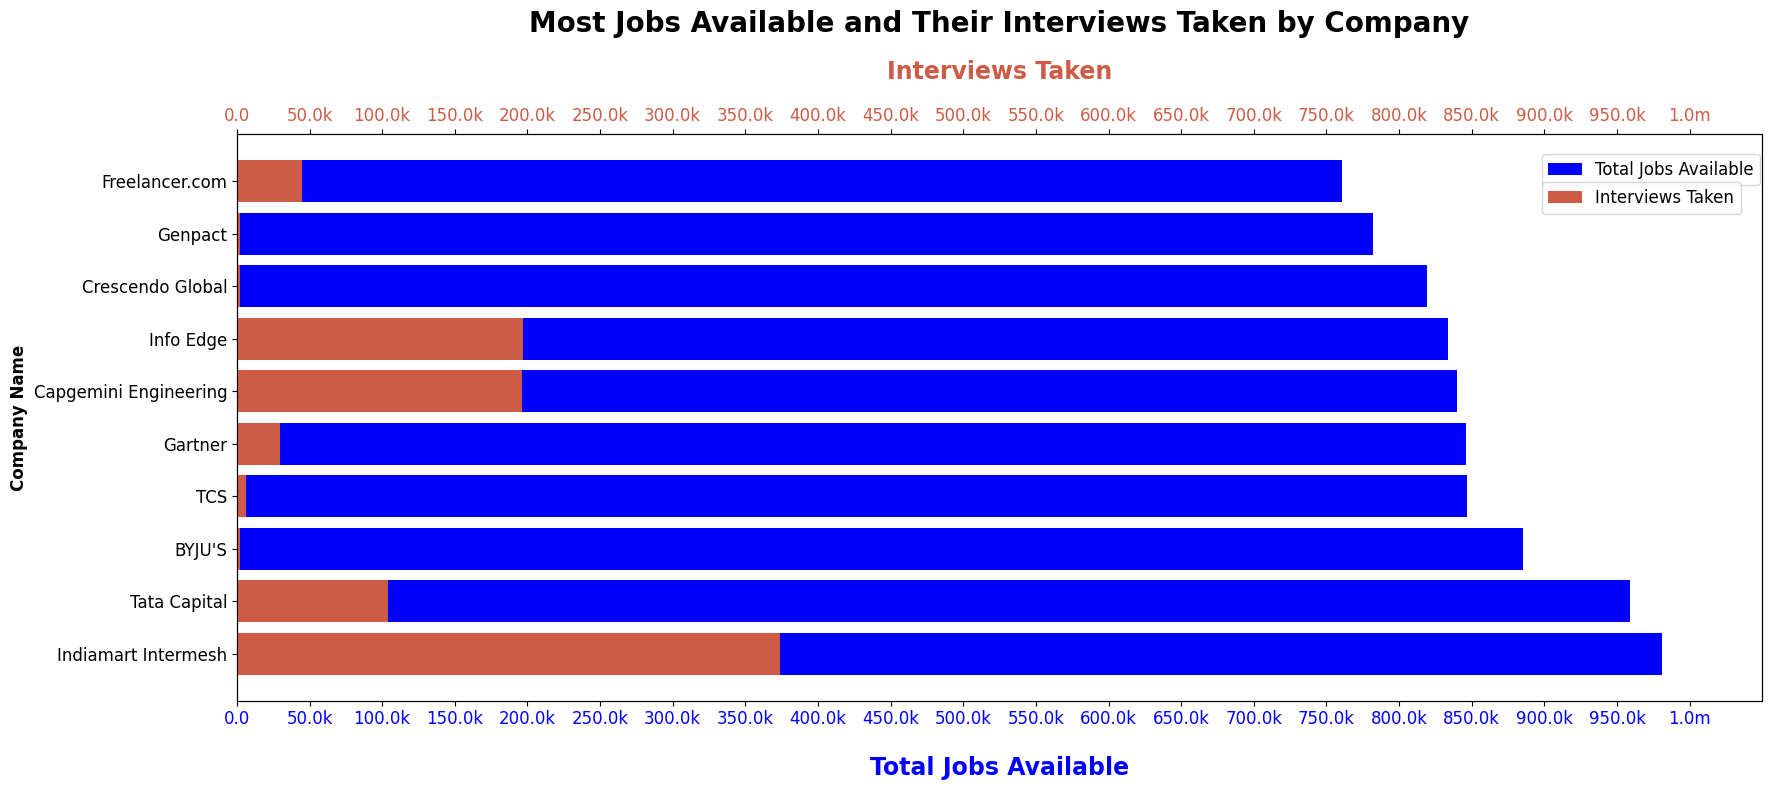

In [24]:
most_job_of_cmpny = cmpny_df.nlargest(10, 'Total_jobs_available').reset_index()
most_job_of_cmpny = most_job_of_cmpny[['Company_name', 'Total_jobs_available', 'Interviews_taken']]
print(most_job_of_cmpny)

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Total Jobs Available (primary y-axis) as horizontal bars
bars1 = ax1.barh(most_job_of_cmpny['Company_name'], most_job_of_cmpny['Total_jobs_available'], label='Total Jobs Available', color='blue')
ax1.set_xticks(np.arange(0, 1050000, 50000))
ax1.set_xlabel('Total Jobs Available', size=17, weight='semibold', color='b', labelpad=20)
ax1.set_ylabel('Company Name', size=12, weight='semibold')
ax1.tick_params(axis='x', labelcolor='b', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Create a second x-axis for Interviews Taken
ax2 = ax1.twiny()
bars2 = ax2.barh(most_job_of_cmpny['Company_name'], most_job_of_cmpny['Interviews_taken'], label='Interviews Taken', color='#CD5B45')
ax2.set_xticks(np.arange(0, 1050000, 50000))
ax2.set_xlabel('Interviews Taken', size=17, weight='semibold', color='#CD5B45', labelpad=20)  # Add labelpad to create space
ax2.tick_params(axis='x', labelcolor='#CD5B45', labelsize=12)

# Set the same limits for both x-axes to centralize
ax1.set_xlim(0, 1050000)
ax2.set_xlim(0, 1050000)

# Add legends for both axes
ax1.legend(bars1, ['Total Jobs Available'], bbox_to_anchor=(0.85, 0.98), loc='upper left', fontsize=12)
ax2.legend(bars2, ['Interviews Taken'], bbox_to_anchor=(0.85, 0.93), loc='upper left', fontsize=12)

# Add title
plt.title('Most Jobs Available and Their Interviews Taken by Company', size=20, weight='bold', pad=20)

# Format the y-axis labels
ax1.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_formatter(formatter)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

#### **What is difference between Most Interview Taken vs Available job**

             Company_name  Interviews_taken  Total_jobs_available
0                Flipkart          972000.0              364000.0
1             LTIMindtree          934000.0               38000.0
2     Reliance Industries          932000.0               40000.0
3                     PwC          790000.0                1200.0
4           Ernst & Young          760000.0                1800.0
5     Kotak Mahindra Bank          738000.0              222000.0
6                     WNS          716000.0              131000.0
7             Tata Motors          704000.0               50000.0
8             Infosys BPM          674000.0              121000.0
9  HDB Financial Services          590000.0               85000.0


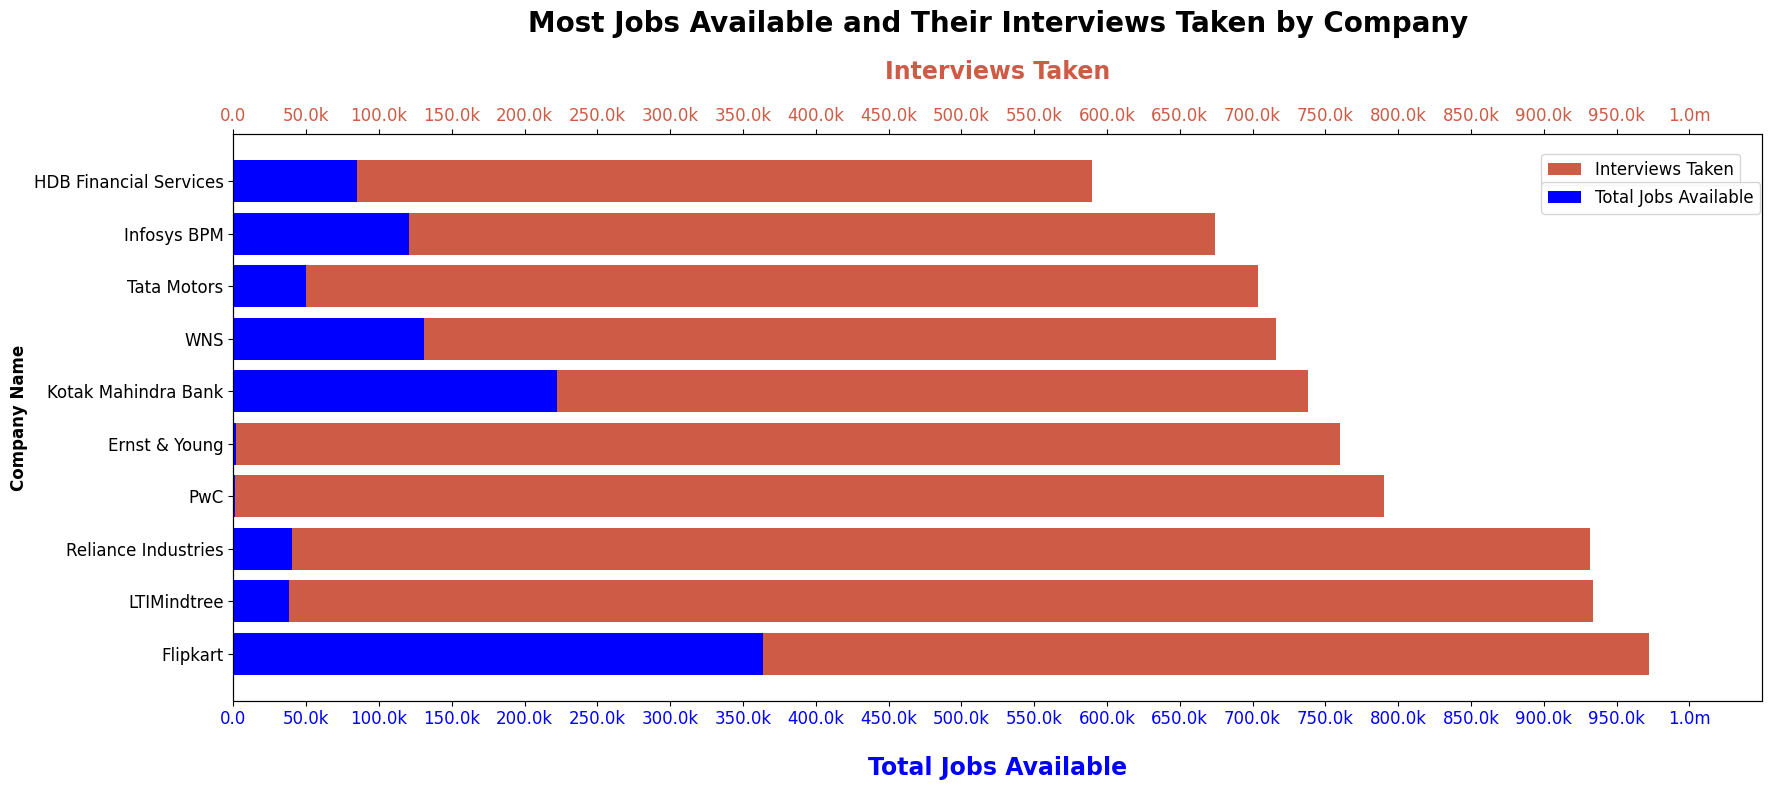

In [25]:
most_interview_taken = cmpny_df.nlargest(10, 'Interviews_taken').reset_index()
most_interview_taken = most_interview_taken[['Company_name', 'Interviews_taken', 'Total_jobs_available']]
print(most_interview_taken)

# Create the plot
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Total Jobs Available (primary y-axis) as horizontal bars
bars1 = ax1.barh(most_interview_taken['Company_name'], most_interview_taken['Interviews_taken'], label='Interviews Taken', color='#CD5B45')
ax1.set_xticks(np.arange(0, 1050000, 50000))
ax1.set_xlabel('Total Jobs Available', size=17, weight='semibold', color='b', labelpad=20)
ax1.set_ylabel('Company Name', size=12, weight='semibold')
ax1.tick_params(axis='x', labelcolor='b', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Create a second x-axis for Interviews Taken
ax2 = ax1.twiny()
bars2 = ax2.barh(most_interview_taken['Company_name'], most_interview_taken['Total_jobs_available'], label='Total Jobs Available', color='blue')
ax2.set_xticks(np.arange(0, 1050000, 50000))
ax2.set_xlabel('Interviews Taken', size=17, weight='semibold', color='#CD5B45', labelpad=20)  # Add labelpad to create space
ax2.tick_params(axis='x', labelcolor='#CD5B45', labelsize=12)

# Set the same limits for both x-axes to centralize
ax1.set_xlim(0, 1050000)
ax2.set_xlim(0, 1050000)

# Add legends for both axes
ax1.legend(bars1, ['Interviews Taken'], bbox_to_anchor=(0.85, 0.98), loc='upper left', fontsize=12)
ax2.legend(bars2, ['Total Jobs Available'], bbox_to_anchor=(0.85, 0.93), loc='upper left', fontsize=12)

# Add title
plt.title('Most Jobs Available and Their Interviews Taken by Company', size=20, weight='bold', pad=20)

# Format the y-axis labels
ax1.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_formatter(formatter)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

#### **Correlation Analysis**

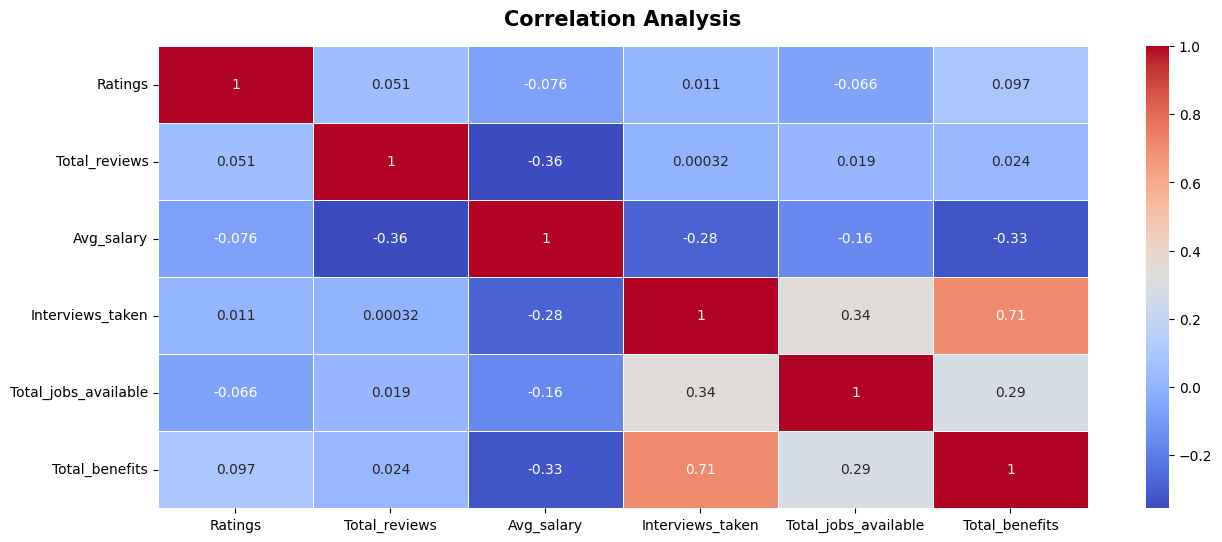

In [26]:
# Correlation Analysis
plt.figure(figsize=(15, 6))
correlation_matrix = cmpny_df[['Ratings', 'Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis', size=15, weight='bold', pad = 15)
plt.show()

## **Export to Report**

In [36]:
!jupyter nbconvert --to html Top_10000_companies.ipynb

[NbConvertApp] Converting notebook Top_10000_companies.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 865739 bytes to Top_10000_companies.html
